In [1]:
import psycopg2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
conn = psycopg2.connect(dbname = "postgres",
                        user= "postgres",
                        password = "shree345!",
                        host = "localhost",
                        port = "5432")

cursor = conn.cursor()

In [2]:
cursor = conn.cursor()


* Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"

In [3]:
cursor.execute("""SELECT CONCAT(UPPER(first_name), ' ',UPPER(last_name)) AS "Actor Name"
FROM actor;""")
# or SELECT UPPER(first_name || ' ' || last_name) as actor_name 
# FROM actor;
rows = cursor.fetchall()
display(rows)

[('PENELOPE GUINESS',),
 ('NICK WAHLBERG',),
 ('ED CHASE',),
 ('JENNIFER DAVIS',),
 ('JOHNNY LOLLOBRIGIDA',),
 ('BETTE NICHOLSON',),
 ('GRACE MOSTEL',),
 ('MATTHEW JOHANSSON',),
 ('JOE SWANK',),
 ('CHRISTIAN GABLE',),
 ('ZERO CAGE',),
 ('KARL BERRY',),
 ('UMA WOOD',),
 ('VIVIEN BERGEN',),
 ('CUBA OLIVIER',),
 ('FRED COSTNER',),
 ('HELEN VOIGHT',),
 ('DAN TORN',),
 ('BOB FAWCETT',),
 ('LUCILLE TRACY',),
 ('KIRSTEN PALTROW',),
 ('ELVIS MARX',),
 ('SANDRA KILMER',),
 ('CAMERON STREEP',),
 ('KEVIN BLOOM',),
 ('RIP CRAWFORD',),
 ('JULIA MCQUEEN',),
 ('WOODY HOFFMAN',),
 ('ALEC WAYNE',),
 ('SANDRA PECK',),
 ('SISSY SOBIESKI',),
 ('TIM HACKMAN',),
 ('MILLA PECK',),
 ('AUDREY OLIVIER',),
 ('JUDY DEAN',),
 ('BURT DUKAKIS',),
 ('VAL BOLGER',),
 ('TOM MCKELLEN',),
 ('GOLDIE BRODY',),
 ('JOHNNY CAGE',),
 ('JODIE DEGENERES',),
 ('TOM MIRANDA',),
 ('KIRK JOVOVICH',),
 ('NICK STALLONE',),
 ('REESE KILMER',),
 ('PARKER GOLDBERG',),
 ('JULIA BARRYMORE',),
 ('FRANCES DAY-LEWIS',),
 ('ANNE CRONYN',),
 ('

* Find all actors whose last name contains the letters "LI"

In [4]:
cursor.execute("""SELECT first_name, last_name 
               FROM actor WHERE last_name LIKE '%LI%';""")
#SELECT UPPER(first_name || ' ' || last_name) as actor_name 
#FROM actor
#WHERE last_name LIKE '%LI%';
rows = cursor.fetchall()
display(rows)

[('CUBA', 'OLIVIER'),
 ('AUDREY', 'OLIVIER'),
 ('SEAN', 'WILLIAMS'),
 ('WOODY', 'JOLIE'),
 ('BEN', 'WILLIS'),
 ('GREG', 'CHAPLIN'),
 ('GENE', 'WILLIS'),
 ('MORGAN', 'WILLIAMS'),
 ('HUMPHREY', 'WILLIS'),
 ('GROUCHO', 'WILLIAMS')]

* List the last names of actors, as well as the amount of actors who have that last name

In [5]:
cursor.execute("""SELECT last_name, COUNT(*) AS actor_count 
                  FROM actor 
                  GROUP BY last_name ORDER BY actor_count DESC;""")
rows = cursor.fetchall()
display(rows)

[('KILMER', 5),
 ('TEMPLE', 4),
 ('NOLTE', 4),
 ('WILLIAMS', 3),
 ('PECK', 3),
 ('HOPKINS', 3),
 ('DAVIS', 3),
 ('HARRIS', 3),
 ('DEGENERES', 3),
 ('HOFFMAN', 3),
 ('GARLAND', 3),
 ('BERRY', 3),
 ('KEITEL', 3),
 ('TORN', 3),
 ('GUINESS', 3),
 ('JOHANSSON', 3),
 ('ZELLWEGER', 3),
 ('AKROYD', 3),
 ('WILLIS', 3),
 ('ALLEN', 3),
 ('CRONYN', 2),
 ('DEPP', 2),
 ('JACKMAN', 2),
 ('HOPPER', 2),
 ('DUKAKIS', 2),
 ('TRACY', 2),
 ('MONROE', 2),
 ('MOSTEL', 2),
 ('MCKELLEN', 2),
 ('WAHLBERG', 2),
 ('DEAN', 2),
 ('BENING', 2),
 ('SILVERSTONE', 2),
 ('WEST', 2),
 ('HACKMAN', 2),
 ('BOLGER', 2),
 ('DEE', 2),
 ('MCQUEEN', 2),
 ('DENCH', 2),
 ('NEESON', 2),
 ('STREEP', 2),
 ('CAGE', 2),
 ('BRODY', 2),
 ('WINSLET', 2),
 ('WOOD', 2),
 ('GOODING', 2),
 ('PENN', 2),
 ('MCCONAUGHEY', 2),
 ('CHASE', 2),
 ('BAILEY', 2),
 ('PALTROW', 2),
 ('TANDY', 2),
 ('CRAWFORD', 2),
 ('FAWCETT', 2),
 ('OLIVIER', 2),
 ('CARREY', 1),
 ('JOLIE', 1),
 ('TOMEI', 1),
 ('BACALL', 1),
 ('PESCI', 1),
 ('TAUTOU', 1),
 ('LEIGH', 1),


* Display the first name, last name, full address, and total payment amount collected in 2022 for each staff member.

In [6]:
cursor.execute("""SELECT
  staff.first_name,
  staff.last_name,
  address.address AS "Street address",
  city.city,
  country.country,
  SUM(payment.amount) as "Total payments" 
FROM payment
JOIN staff on payment.staff_id = staff.staff_id
JOIN address ON address.address_id = staff.address_id
JOIN city on city.city_id = address.city_id
JOIN country on city.country_id = country.country_id
GROUP BY staff.first_name, staff.last_name, address.address, city.city, country.country;""")
rows = cursor.fetchall()
display(rows)

[('Jon',
  'Stephens',
  '1411 Lillydale Drive',
  'Woodridge',
  'Australia',
  Decimal('33927.04')),
 ('Mike',
  'Hillyer',
  '23 Workhaven Lane',
  'Lethbridge',
  'Canada',
  Decimal('33489.47'))]

* Display all actors who appear in the film Alone Trip

In [7]:
cursor.execute("""SELECT actor.first_name, actor.last_name 
                  FROM actor
                  JOIN film_actor ON actor.actor_id = film_actor.actor_id
                  JOIN film ON film_actor.film_id = film.film_id
                  WHERE film.title = 'ALONE TRIP'
                  ORDER BY actor.actor_id;""")
rows = cursor.fetchall()
display(rows)

[('ED', 'CHASE'),
 ('KARL', 'BERRY'),
 ('UMA', 'WOOD'),
 ('WOODY', 'JOLIE'),
 ('SPENCER', 'DEPP'),
 ('CHRIS', 'DEPP'),
 ('LAURENCE', 'BULLOCK'),
 ('RENEE', 'BALL')]

                 Another way:
                 SELECT
                  actor.actor_id,
                  actor.first_name,
                 actor.last_name
                 FROM actor
                 WHERE actor_id IN (
                 SELECT film_actor.actor_id
                 FROM film_actor
                 INNER JOIN film ON film.film_id = film-actor.film_id
                 WHERE film.title ILIKE 'alone trip'
                 )
                 ORDER BY actor.actor_id
                 ;

* What customer had the highest amount of rentals in 2022?

In [8]:
cursor.execute("""SELECT
                  customer.customer_id,
                  customer.first_name,
                  customer.last_name,
                  COUNT(rental.rental_id) AS rental_count
                  FROM customer
                  JOIN rental ON customer.customer_id = rental.customer_id
                  JOIN payment ON rental.rental_id = payment.rental_id
                  WHERE EXTRACT(YEAR FROM rental.rental_date) = 2022
                  GROUP BY customer.customer_id
                  ORDER BY rental_count DESC
                  LIMIT 1;""")
rows = cursor.fetchall()
display(rows)

[(148, 'ELEANOR', 'HUNT', 46)]

* What store had the highest number of rentals for family movies?

In [9]:
cursor.execute("""SELECT customer.store_id, COUNT(rental.rental_id) AS num_rentals 
      FROM rental JOIN customer ON rental.customer_id = customer.customer_id
	  JOIN inventory ON inventory.inventory_id = rental.customer_id 
	  JOIN film_category ON film_category.film_id = inventory.film_id
	  JOIN category ON category.category_id = film_category.category_id
	  WHERE category.name = 'Family'
      GROUP BY customer.store_id
	  ORDER BY num_rentals DESC
	  LIMIT 1""")

rows = cursor.fetchall()
display(rows)

[(1, 631)]

#### Python (Use a combination of queries using psycopg2 and pandas code to answer the following)

##### Create a graphic to display the top 20 rented films. Then do the same for the bottom 20

,Movie Title,Rental Count
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,FORWARD TEMPLE,32
3,SCALAWAG DUCK,32
4,RIDGEMONT SUBMARINE,32
5,GRIT CLOCKWORK,32
6,JUGGLER HARDLY,32
7,APACHE DIVINE,31
8,NETWORK PEAK,31
9,TIMBERLAND SKY,31


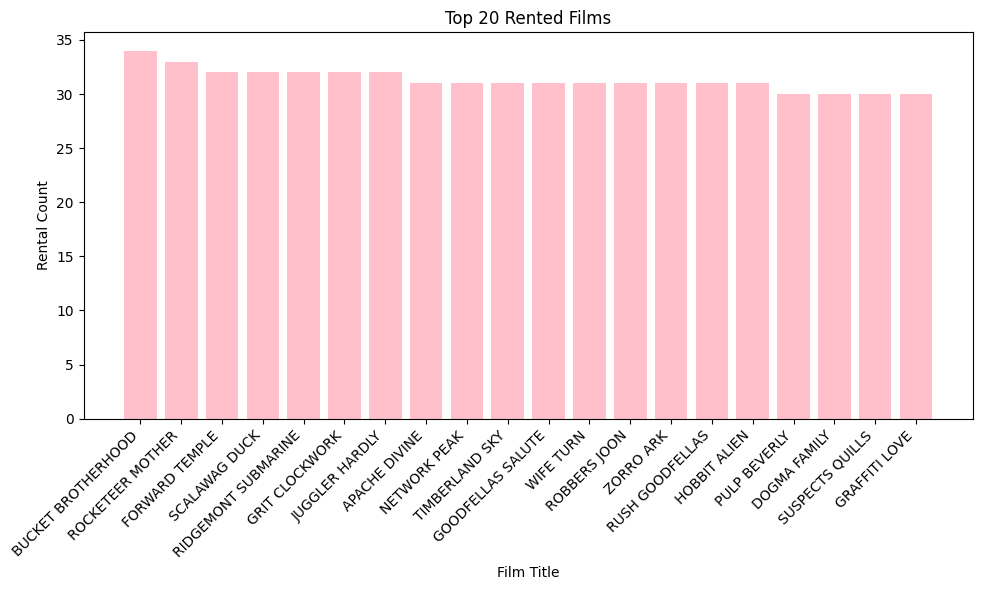

In [10]:
cursor.execute("""SELECT film.title, COUNT(rental.rental_id) as num_rentals 
               FROM film 
               JOIN inventory ON film.film_id = inventory.film_id 
               JOIN rental on rental.inventory_id = inventory.inventory_id
               GROUP BY title
               ORDER BY num_rentals DESC
               LIMIT 20;""")
rows = cursor.fetchall() 
top20_rentals = pd.DataFrame(rows)
top20_rentals.columns = ["Movie Title", "Rental Count"]
display(top20_rentals)

plt.figure(figsize=(10, 6))
plt.bar(top20_rentals['Movie Title'], top20_rentals['Rental Count'], color='pink')
plt.title('Top 20 Rented Films')
plt.xlabel('Film Title')
plt.ylabel('Rental Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


,Movie Title,Rental Count
0,HARDLY ROBBERS,4
1,MIXED DOORS,4
2,TRAIN BUNCH,4
3,FEVER EMPIRE,5
4,PRIVATE DROP,5
5,MUSSOLINI SPOILERS,5
6,TRAFFIC HOBBIT,5
7,FULL FLATLINERS,5
8,FREEDOM CLEOPATRA,5
9,BUNCH MINDS,5


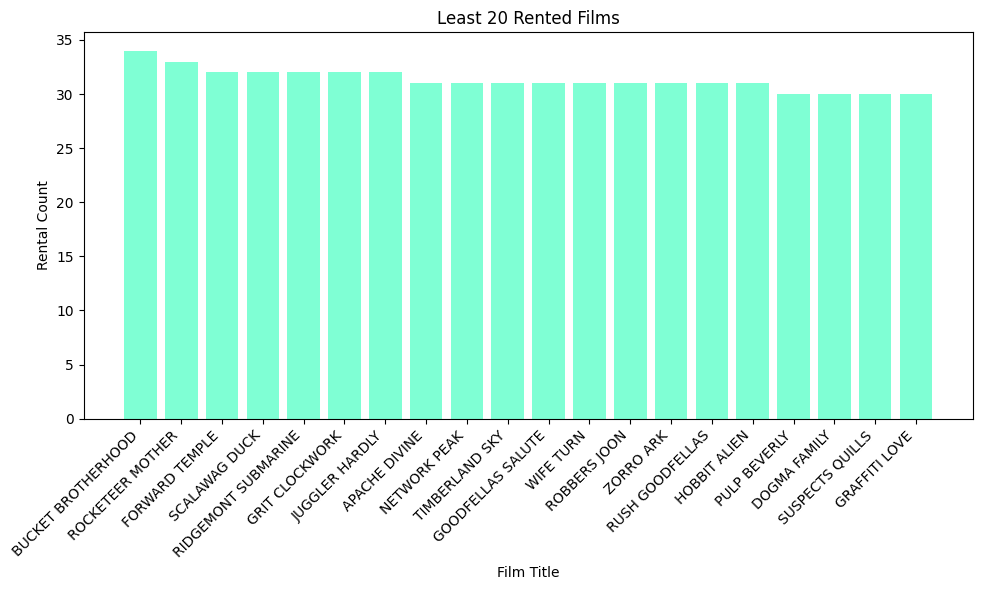

In [11]:
cursor.execute("""SELECT film.title, COUNT(rental.rental_id) as num_rentals 
               FROM film 
               JOIN inventory ON film.film_id = inventory.film_id 
               JOIN rental on rental.inventory_id = inventory.inventory_id
               GROUP BY title
               ORDER BY num_rentals 
               LIMIT 20;""")
rows = cursor.fetchall() 
least20_rentals = pd.DataFrame(rows)
least20_rentals.columns = ["Movie Title", "Rental Count"]


display(least20_rentals)

plt.figure(figsize=(10, 6))
plt.bar(top20_rentals['Movie Title'], top20_rentals['Rental Count'], color='#7FFFD4')
plt.title('Least 20 Rented Films')
plt.xlabel('Film Title')
plt.ylabel('Rental Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Create a graphic that compares the amount of sales each store has brought in.

,Store ID,Sales
0,2,33927.04
1,1,33489.47


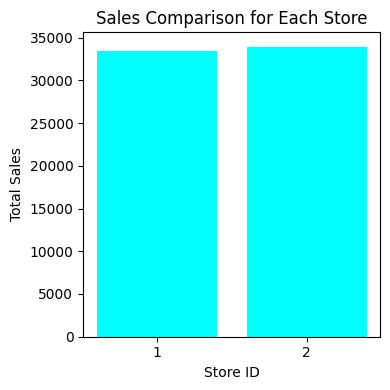

In [12]:
cursor.execute("""SELECT staff.store_id, SUM(payment.amount) as total_sales 
	FROM staff JOIN payment on staff.staff_id = payment.staff_id
	GROUP BY staff.store_id""")
rows = cursor.fetchall()
sales_df = pd.DataFrame(rows)
sales_df.columns = ["Store ID", "Sales"]
display(sales_df)

plt.figure(figsize=(4, 4))
plt.bar(sales_df['Store ID'], sales_df['Sales'], color='#00FFFF')
plt.title('Sales Comparison for Each Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
custom_positions = [1, 2]
plt.xticks(custom_positions)
plt.tight_layout()
plt.show()

##### Create a python function that will display a graphic the showcases the top N genres by gross revenue.

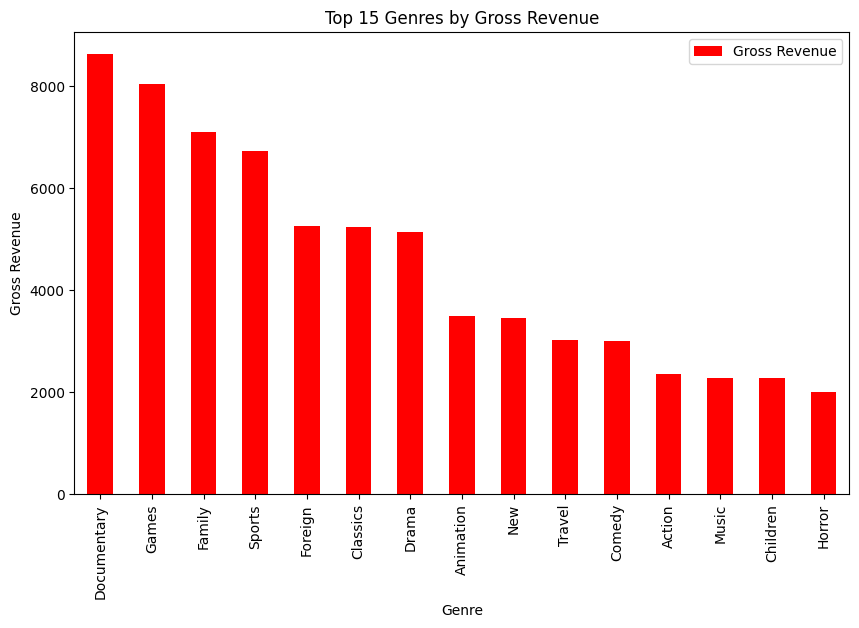

In [13]:
def top_genre(n):
    cursor.execute(f"""SELECT category.name AS genre, SUM(payment.amount) AS revenue 
                   FROM payment JOIN rental on payment.rental_id = rental.rental_id 
                   JOIN inventory on rental.inventory_id = inventory.inventory_id 
                   JOIN film_category ON inventory.film_id = film_category.category_id 
                   JOIN category ON film_category.category_id = category.category_id 
                   GROUP BY genre ORDER BY revenue DESC
                   LIMIT {n}""")
 
    rows = cursor.fetchall()
    rows = [(genre, float(gross)) for genre, gross in rows]
    genre_df = pd.DataFrame(rows)
    genre_df.columns = ["Genre", "Gross Revenue"]

    
    genre_df.plot(kind = 'bar', x="Genre", y="Gross Revenue", figsize=(10, 6), color='red')
    plt.title(f"Top {n} Genres by Gross Revenue")
    plt.xlabel("Genre")
    plt.ylabel("Gross Revenue")
    plt.show()

top_genre(15)



##### Create a graphic showing the average replacement cost by category

,Genre,Average Replacement Cost
0,Drama,28.99
1,Classics,26.99
2,Games,24.99
3,Sci-Fi,23.99
4,Travel,23.99
5,Music,22.99
6,Comedy,22.99
7,Foreign,21.99
8,New,21.99
9,Action,20.99


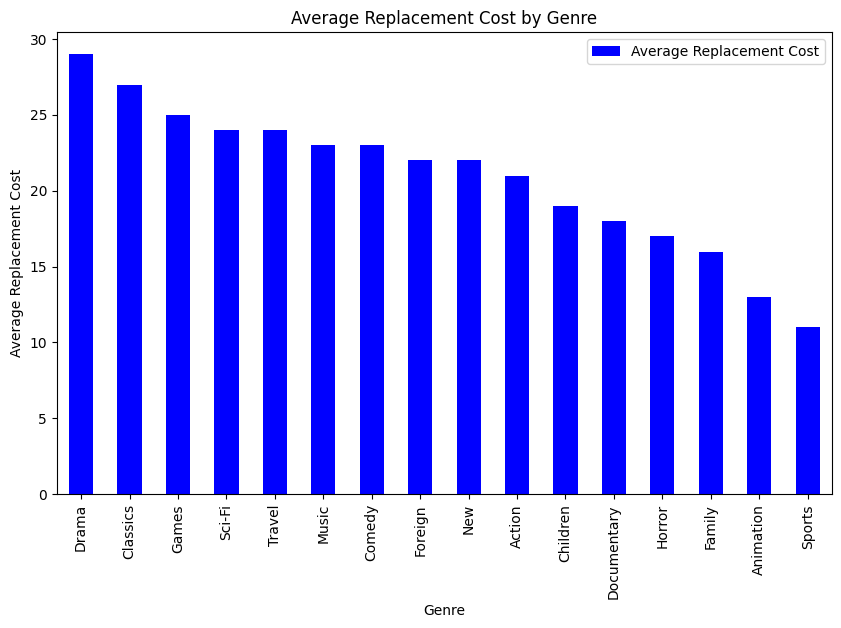

In [14]:
cursor.execute("""SELECT category.name AS genre, ROUND(AVG(film.replacement_cost),2) as avg_rc
	FROM film 
	JOIN film_category ON film.film_id = film_category.category_id
	JOIN category ON film_category.category_id = category.category_id
	GROUP BY genre
	ORDER BY avg_rc DESC""")

rows = cursor.fetchall()
replacement_cost = pd.DataFrame(rows)
replacement_cost.columns = ["Genre", "Average Replacement Cost"]
replacement_cost["Average Replacement Cost"] = replacement_cost["Average Replacement Cost"].astype(float)
display(replacement_cost)

replacement_cost.plot(kind = 'bar', x="Genre", y="Average Replacement Cost", figsize=(10, 6), color='blue')
plt.title("Average Replacement Cost by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Replacement Cost")
plt.show()

#### Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)

,Rating,Films
0,PG,194
1,NC-17,210
2,G,178
3,R,195
4,PG-13,223


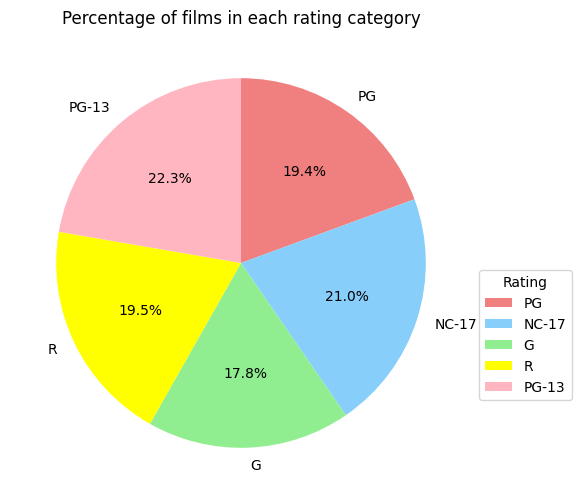

In [15]:
cursor.execute("""SELECT rating, COUNT(film_id) AS films
	FROM film
	GROUP BY rating""")
rows = cursor.fetchall()
ratings_category = pd.DataFrame(rows)
ratings_category.columns = ["Rating", "Films"]
ratings = ratings_category["Rating"]
films = ratings_category["Films"]
display(ratings_category)

custom_colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'yellow', 'lightpink']
plt.figure(figsize=(6, 6))
plt.pie(films, labels=ratings, autopct='%1.1f%%', startangle=90, counterclock=False, colors= custom_colors)

plt.title('Percentage of films in each rating category')
plt.legend(title="Rating", loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

#### For each category, on average how many rentals of a film need to occur to cover the replacement cost?

In [16]:
cursor.execute("""SELECT category.name AS genre, AVG(film.rental_rate) as avg_rental, 
               AVG(film.replacement_cost) as avg_rc,
               ROUND((AVG(film.replacement_cost) / AVG(film.rental_rate)),2) AS cover_rep_cost
	FROM film JOIN film_category ON film.film_id = film_category.category_id
	JOIN category ON film_category.category_id = category.category_id
    JOIN inventory ON film.film_id = inventory.film_id
    JOIN rental ON inventory.inventory_id = rental.inventory_id
    JOIN payment ON rental.rental_id = payment.rental_id
	GROUP BY genre""")
rows = cursor.fetchall()
rental = pd.DataFrame(rows)
rental.columns = ["Genre", "Avg. Rental Cost", "Avg. Replacement Cost", "Rentals To Cover Replacement"]

display(rental)


,Genre,Avg. Rental Cost,Avg. Replacement Cost,Rentals To Cover Replacement
0,Sports,2.9900000000000000,10.9900000000000000,3.68
1,Classics,2.9900000000000000,26.9900000000000000,9.03
2,New,4.9900000000000000,21.9900000000000000,4.41
3,Family,4.9900000000000000,15.9900000000000000,3.20
4,Comedy,2.9900000000000000,22.9900000000000000,7.69
5,Animation,4.9900000000000000,12.9900000000000000,2.60
6,Travel,2.9900000000000000,23.9900000000000000,8.02
7,Music,0.99000000000000000000,22.9900000000000000,23.22
8,Drama,4.9900000000000000,28.9900000000000000,5.81
9,Horror,0.99000000000000000000,16.9900000000000000,17.16
